In [4]:
# imports

import yaml
import pretty_midi

import numpy as np
import matplotlib.pyplot as plt
import librosa.display

import IPython.display


In [5]:
# config
# e.g. file/directory paths

dataset_path = "Dataset\DataTensor"

In [3]:
def load_dataset(path):
    pass


In [4]:
def train_val_test_split(dataset, val_portion=0.05, test_portion=0.05):
    pass


## Preprocess

Convert MIDI files to .pickle. These will be used as input to our models. Each composor saved by themselves and as a combined set.

In [53]:
%run MusicTransformer/preprocess ./Dataset/ClassicalMusicMIDI/mozart ./Dataset/TrainingMIDI

./Dataset/DataTensor
 [./Dataset/ClassicalMusicMIDI/mozart\mz_311_1.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_311_2.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_311_3.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_330_1.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_330_2.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_330_3.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_331_1.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_331_2.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_331_3.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_332_1.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_332_2.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_332_3.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_333_1.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_333_2.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_333_3.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_545_1.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_545_2.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_545_3.mid] [./Dataset/ClassicalMusicMIDI/mozart\mz_570_1.mid] [./Datase

## Training

// Todo - Detail

We now train our 4 networks architectures on our datasets. Changes are made directly to YAML files since they are "hard" to edit.

In [131]:
%run MusicTransformer/train.py -c ./MusicTransformer/config/base.yml ./MusicTransformer/config/train.yml -m ./Models

./Dataset/TrainingMIDI/asa
<class Data has "0" files>
MusicTransformer(
  (Decoder): Encoder(
    (embedding): Embedding(391, 256)
    (pos_encoding): DynamicPositionEmbedding()
    (enc_layers): ModuleList(
      (0): EncoderLayer(
        (rga): RelativeGlobalAttention(
          (Wq): Linear(in_features=256, out_features=256, bias=True)
          (Wk): Linear(in_features=256, out_features=256, bias=True)
          (Wv): Linear(in_features=256, out_features=256, bias=True)
          (fc): Linear(in_features=256, out_features=256, bias=True)
        )
        (FFN_pre): Linear(in_features=256, out_features=128, bias=True)
        (FFN_suf): Linear(in_features=128, out_features=256, bias=True)
        (layernorm1): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
        (layernorm2): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderLayer(
        (rga

## Generation

Generation text here

In [143]:
%run MusicTransformer/generate.py -c ./MusicTransformer/config/base.yml ./MusicTransformer/config/train.yml ./MusicTransformer/config/generate.yml -m ./Models

Dataset/ClassicalMusicMIDI/albeniz/alb_esp1.mid


NameError: name 'condition_file' is not defined

### Plot MIDI File



In [6]:
# Code from https://notebook.community/craffel/pretty-midi/Tutorial

def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

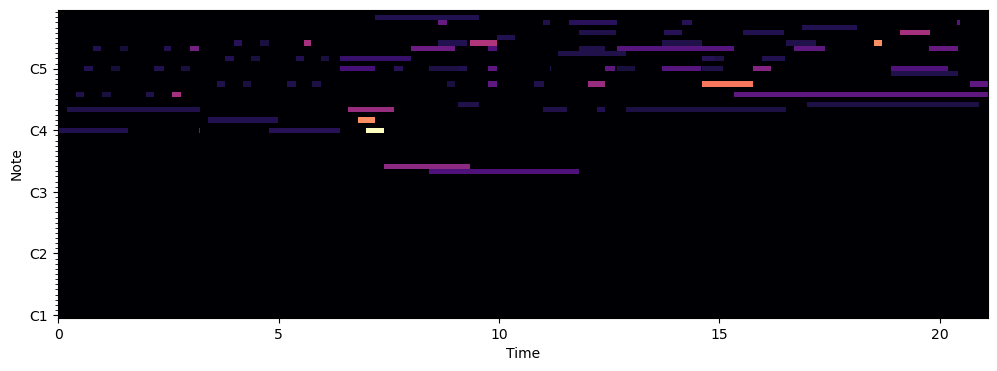

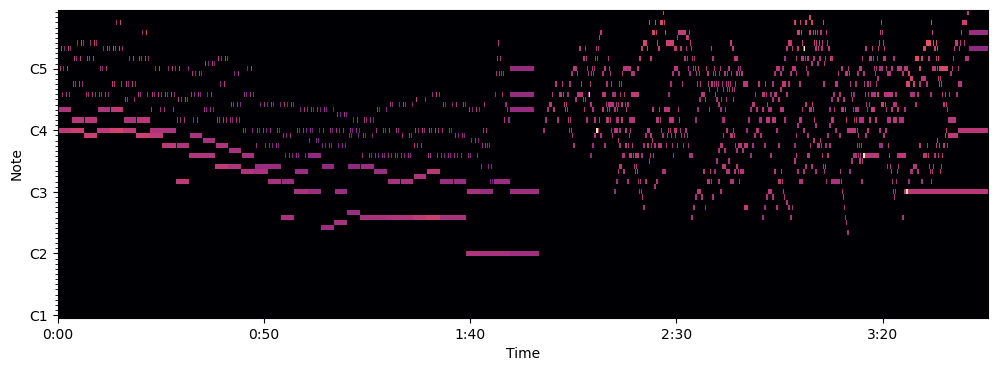

In [15]:
# Basic plot comparison we can use in report

pm = pretty_midi.PrettyMIDI('bin/bach_846_P_R.mid')

plt.figure(figsize=(12, 4))
plot_piano_roll(pm, 24, 84)

pm_clean = pretty_midi.PrettyMIDI('bin/bach_846.mid')

plt.figure(figsize=(12, 4))
plot_piano_roll(pm_clean, 24, 84)

In [6]:
def training_loop(model, train_dataset, val_dataset, num_epochs=5):
    pass


In [7]:
def generate_midi(model):
    pass


In [8]:
def save_midi(path):
    pass


### Putting it all together

In [ ]:
model = None
dataset = load_dataset(dataset_path)
train_dataset, val_dataset, test_dataset = train_val_test_split(dataset)
trainin_loop(model, train_dataset, val_dataset)
midi = generate_midi(model)
save_midi(midi)
